# Database Connection

In [24]:
from google.cloud import bigquery
from google.oauth2 import service_account

credentials = service_account.Credentials.from_service_account_file('/is3107-team-1-b7051077a0af.json')

project_id = 'is3107-team-1'
dataset_id = 'spotify'
table_id = 'track'

client = bigquery.Client(credentials= credentials,project=project_id)
dataset_ref = bigquery.DatasetReference(project_id, dataset_id)
table_ref = dataset_ref.table(table_id)
table = client.get_table(table_ref)

df = client.list_rows(table).to_dataframe()
df

,track_id,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,mode,tempo,valence,country
0,4SqPZorSDuUtvdJwVGeZRC,0.6270,0.539,0.729,0.000941,0,0.1280,-7.588,1,112.074,0.4350,IN
1,1ohg9bhutn8arbTvPOH4hC,0.4310,0.810,0.430,0.000000,0,0.1090,-6.753,0,140.021,0.0861,RU
2,4ASA1PZyWGbuc4d9N8OAcF,0.1490,0.636,0.909,0.000000,0,0.7190,-3.685,1,154.189,0.6100,BR
3,0ofHAoxe9vBkTCp2UQIavz,0.0644,0.828,0.492,0.004280,0,0.1280,-9.744,1,120.151,0.7890,AU
4,2gYj9lubBorOPIVWsTXugG,0.1030,0.680,0.922,0.000000,0,0.0877,-1.215,1,125.014,0.7990,SG
...,...,...,...,...,...,...,...,...,...,...,...,...
995,7FbrGaHYVDmfr7KoLIZnQ7,0.4350,0.783,0.592,0.000004,11,0.3470,-8.332,0,120.018,0.7260,UK
996,7FbrGaHYVDmfr7KoLIZnQ7,0.4350,0.783,0.592,0.000004,11,0.3470,-8.332,0,120.018,0.7260,AU
997,7foeH2Emgq8A3LWk3q6dat,0.0119,0.800,0.792,0.000001,11,0.0495,-4.953,1,102.000,0.4550,JP
998,7foeH2Emgq8A3LWk3q6dat,0.0119,0.800,0.792,0.000001,11,0.0495,-4.953,1,102.000,0.4550,SG


# Data Analysis

In [25]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans
from kneed import KneeLocator
from sklearn import preprocessing
from scipy.spatial.distance import cdist
from sklearn.cluster import AgglomerativeClustering
import plotly
import plotly.express as px
from math import pi
from sklearn.preprocessing import MinMaxScaler

In [26]:
df['key'] = df['key'].astype(float)
df['mode'] = df['mode'].astype(float)
df.dtypes

track_id             object
acousticness        float64
danceability        float64
energy              float64
instrumentalness    float64
key                 float64
liveness            float64
loudness            float64
mode                float64
tempo               float64
valence             float64
country              object
dtype: object

In [27]:
def get_audio_feature_mean(df,i):
    audiofeat_df = df[['danceability', 'energy', 'acousticness', 'liveness', 'valence']]
    plt.figure(figsize=(10,4))
    country = set(df['country'])
    ax = plt.subplot(4,3,int(i+1))
    ax.title.set_text(country)  
    audiofeat_df.mean().plot.bar()
    plt.title(f'Mean Values of Audio Features for {country}')
    plt.show()
    
      

In [28]:
def get_feature_hist(df):
    # fetching a list of song features
    categories = [
        "danceability",
        "energy",
        "loudness",
        "acousticness",
        "liveness",
        "valence",
        "tempo",
        "key"
    ]
    country = set(df['country'])

    # plotting histogram for each feature
    for col in categories:
        sns.displot(df[categories], x=col, kde=True)
        plt.title(f'{col} for {country}')
        plt.show()

In [29]:
def get_heatmap(df):
    # Generate a mask for the upper triangle
    mask = np.triu(np.ones_like(df.corr(), dtype=bool))

    # Set up the matplotlib figure
    f, ax = plt.subplots(figsize=(11, 8))

    # Generate a custom diverging colormap
    cmap = sns.diverging_palette(230, 20, as_cmap=True)

    # Draw the heatmap with the mask and correct aspect ratio
    sns.heatmap(df.corr(), mask=mask, cmap=cmap, vmin=0, vmax=.5, 
                square=True, linewidths=.5, cbar_kws={"shrink": .5})
    
    country = set(df['country'])
    
    plt.title(f'Heatmap for {country}')
    plt.show()

In [30]:
def radar_chart(df, color):
    # Radar Chart with several heads from DataFrame
    # Creating Radar Chart

    categories = [
        "danceability",
        "energy",
        "loudness",
        "acousticness",
        "instrumentalness",
        "liveness",
        "valence",
        "tempo",
        "key"
    ]

    df = df[categories]
    N = len(categories)
    
    min_max_scaler = MinMaxScaler()
    pd.set_option("mode.chained_assignment", None)
    df.loc[:] = min_max_scaler.fit_transform(df.loc[:])

    value = list(df.mean())
    value += value[:1]

    angles = [n / float(N) * 2 * pi for n in range(N)]
    angles += angles[:1]

    plt.polar(angles, value, marker = '.', color=color)
    plt.fill(angles, value, alpha=0.3, color=color)

    plt.xticks(angles[:-1], categories)
    plt.yticks([0.2,0.4,0.6,0.8])
    plt.ylim(0,1)

In [31]:
country_list = set(df['country'])

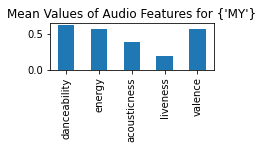

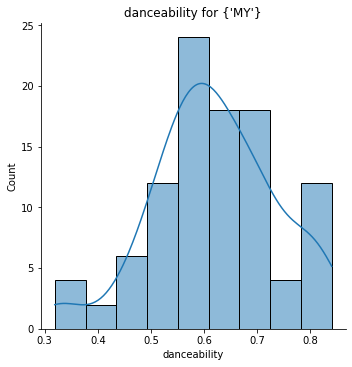

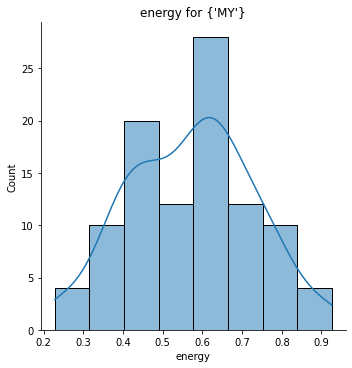

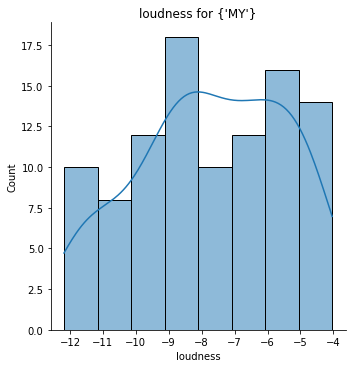

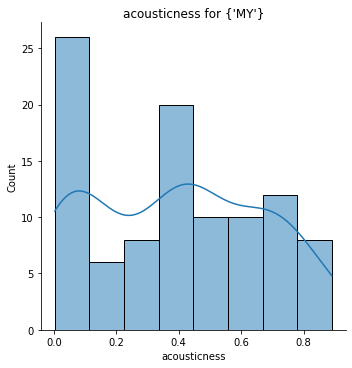

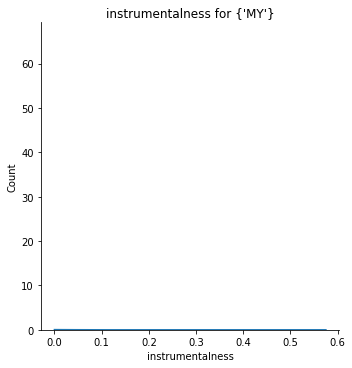

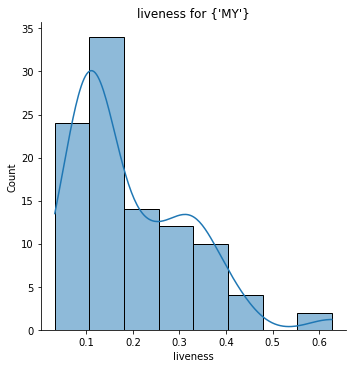

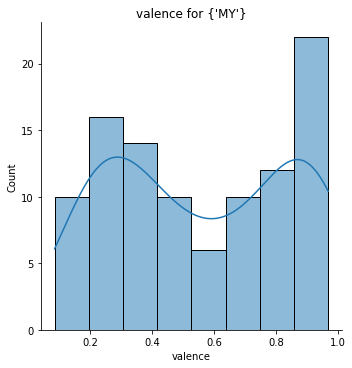

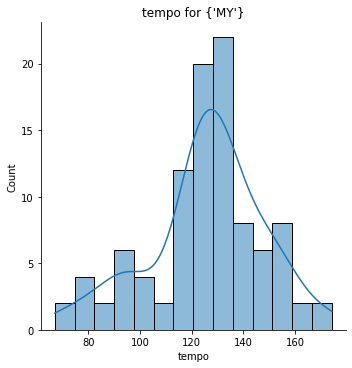

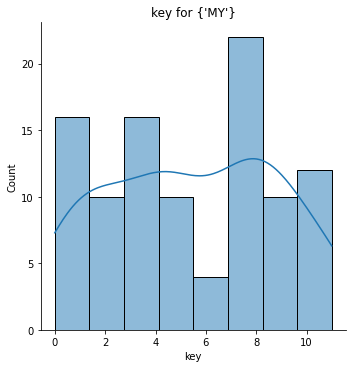

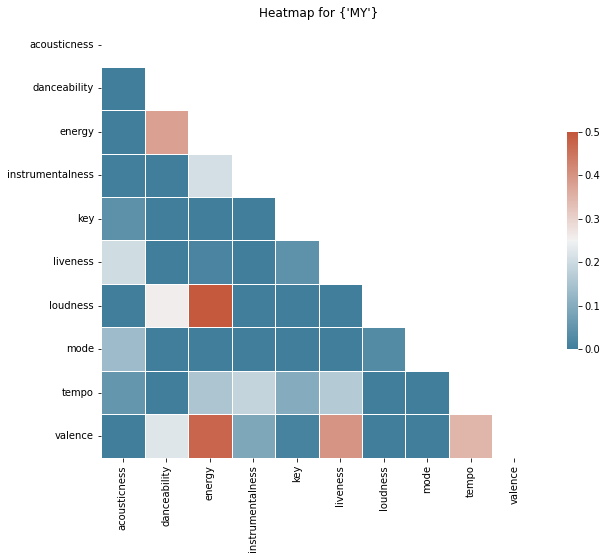

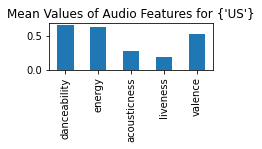

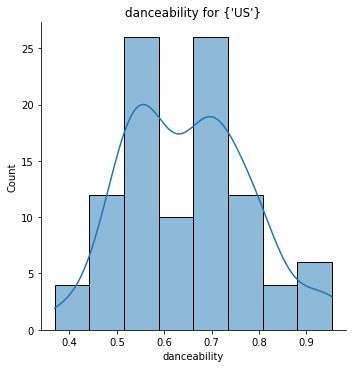

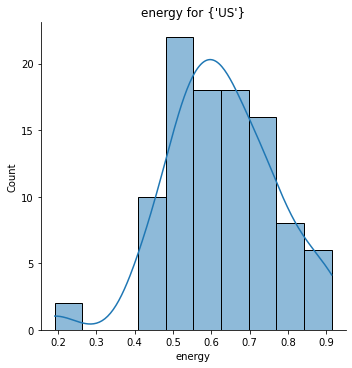

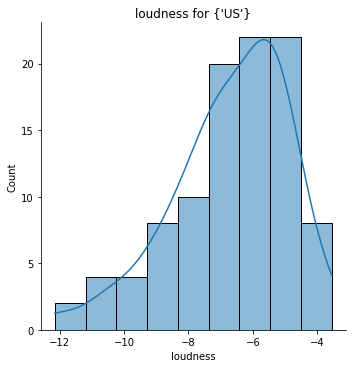

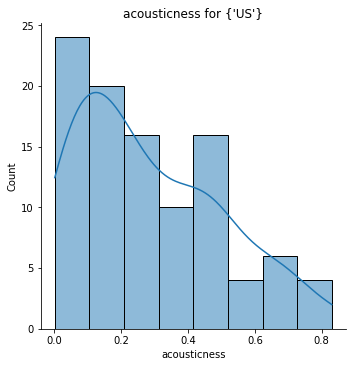

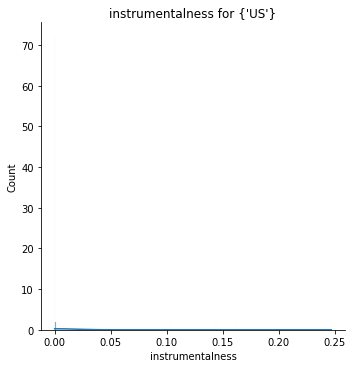

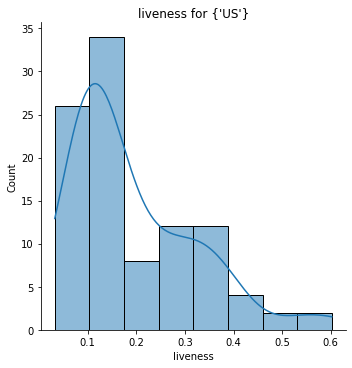

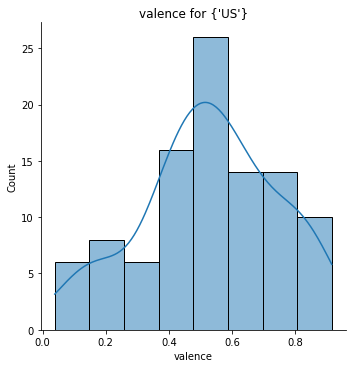

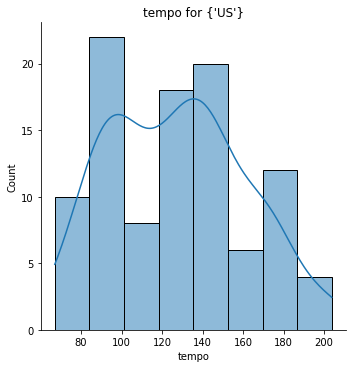

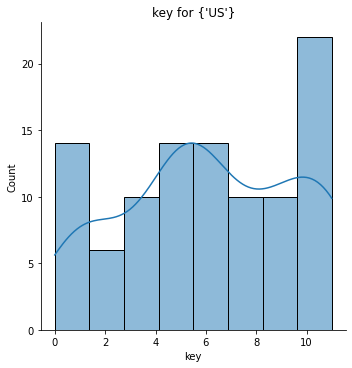

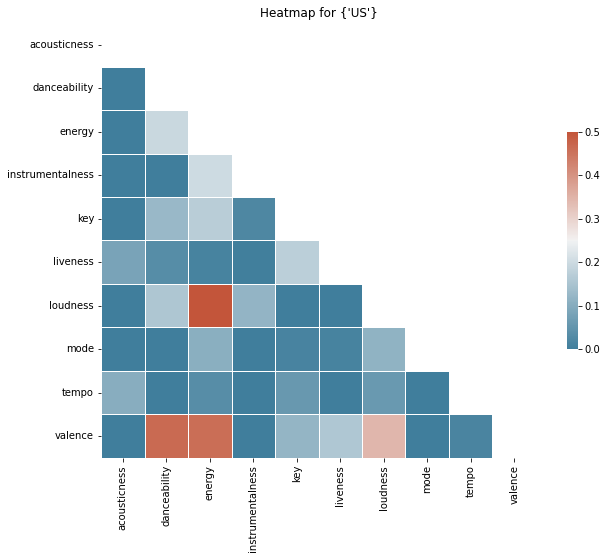

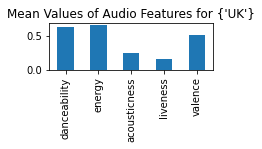

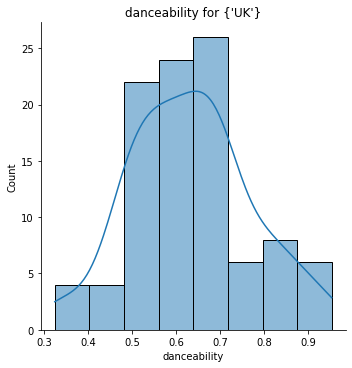

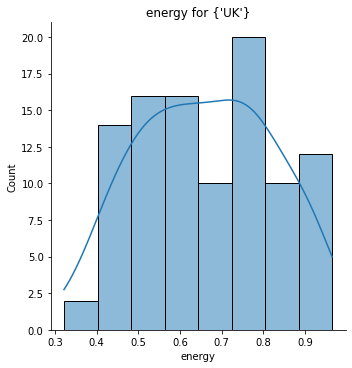

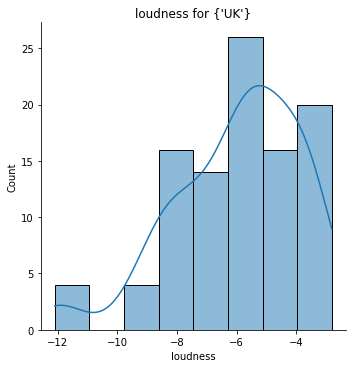

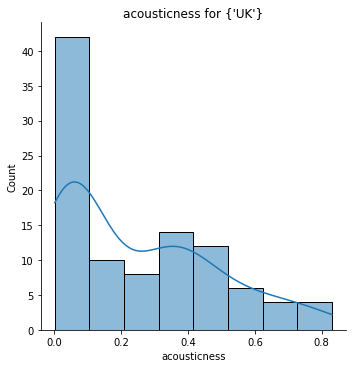

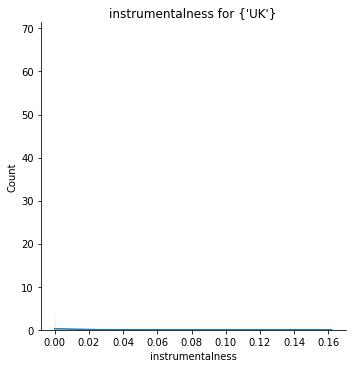

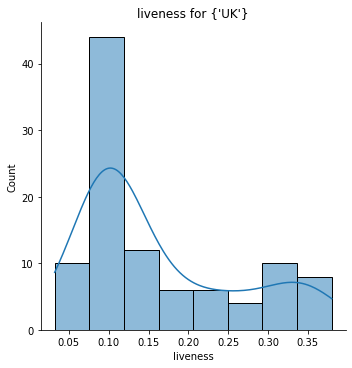

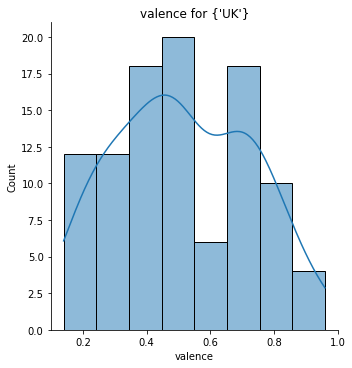

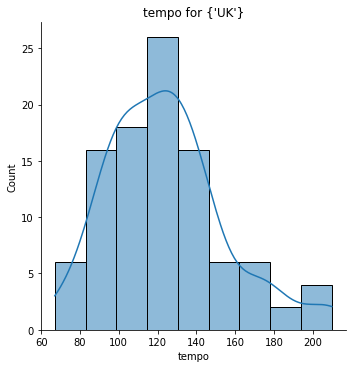

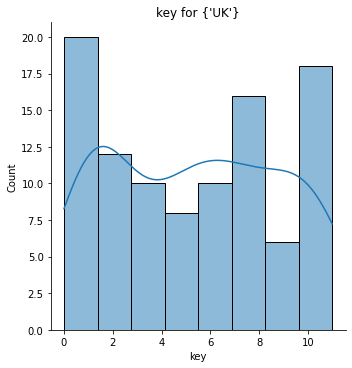

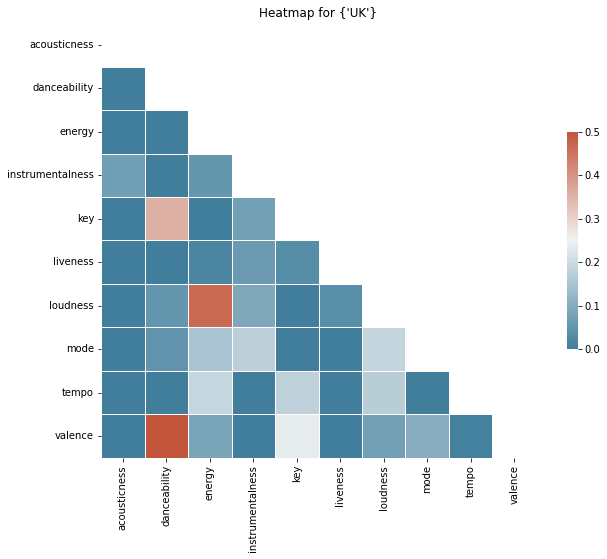

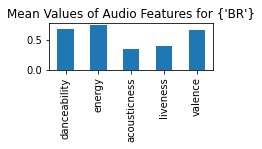

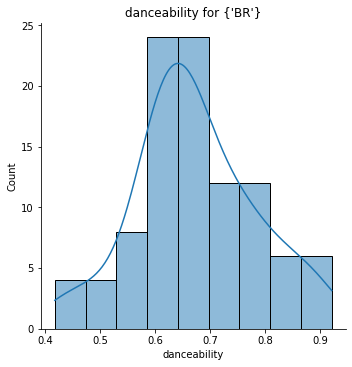

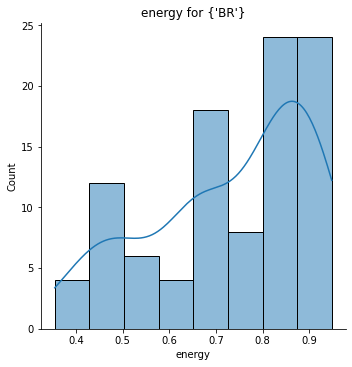

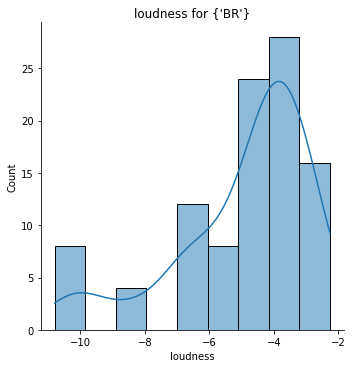

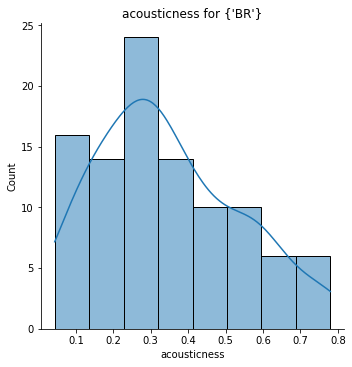

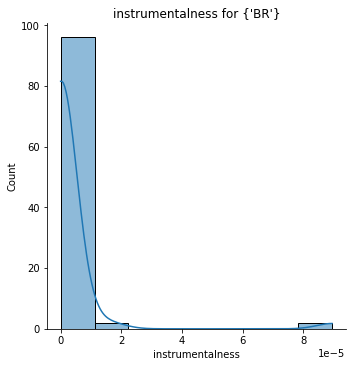

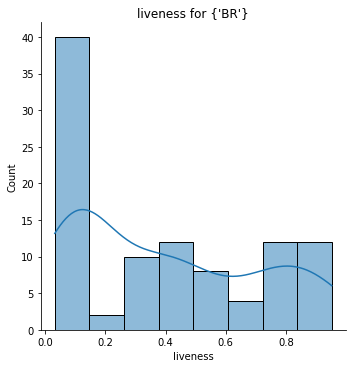

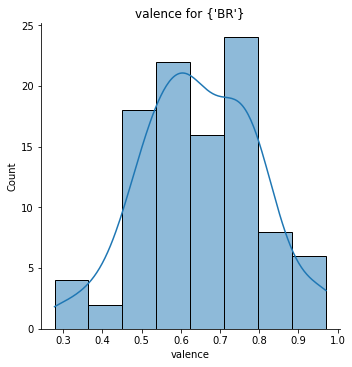

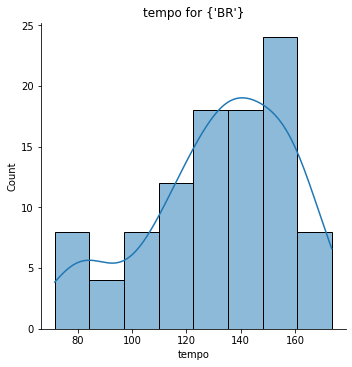

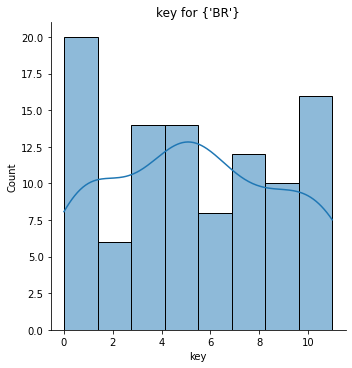

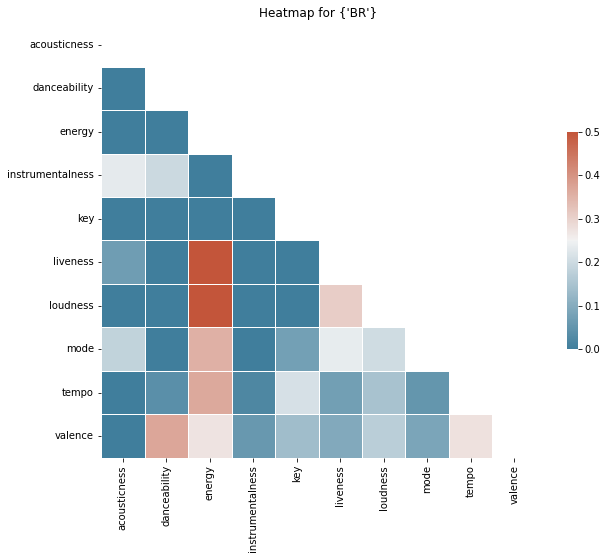

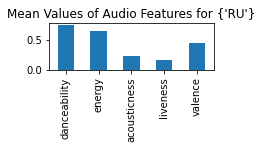

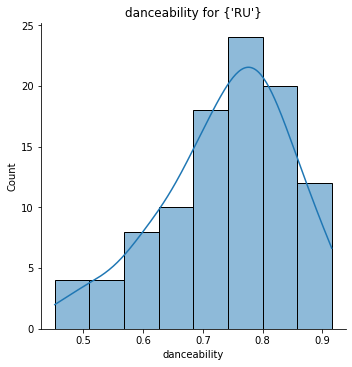

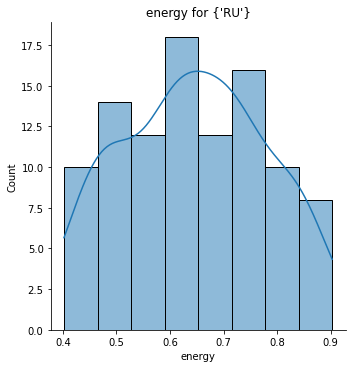

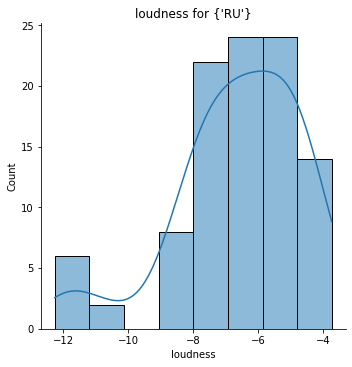

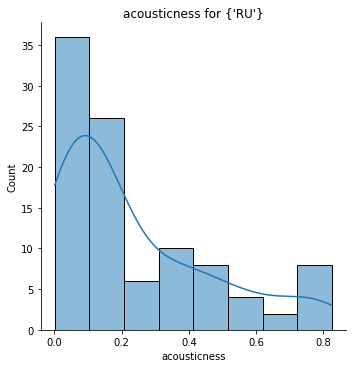

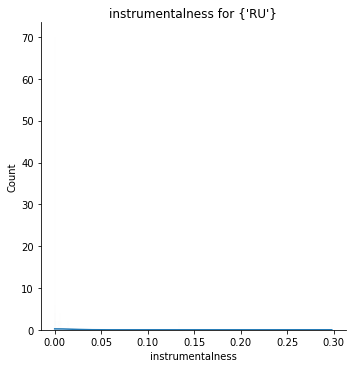

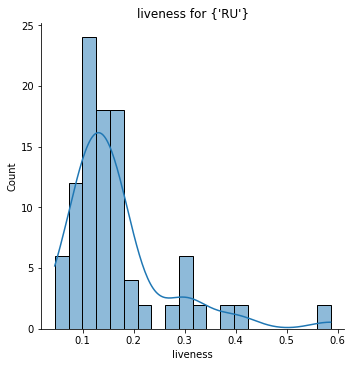

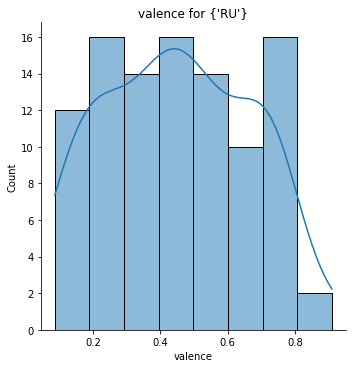

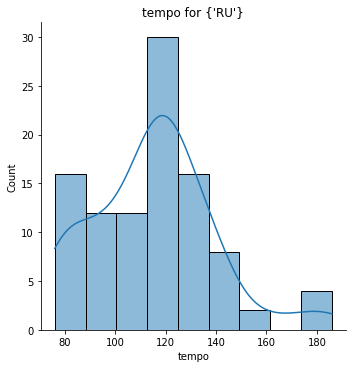

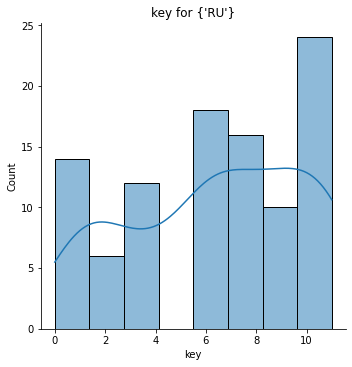

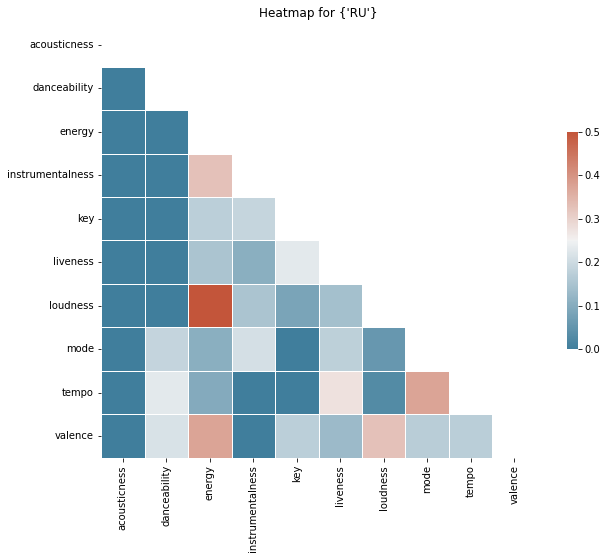

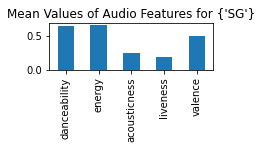

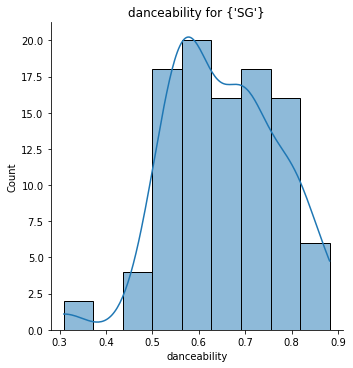

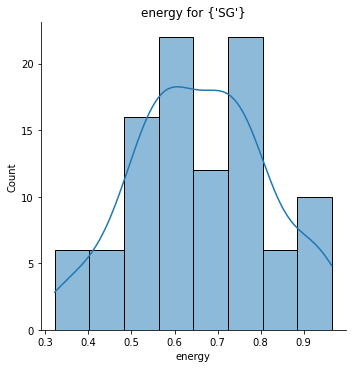

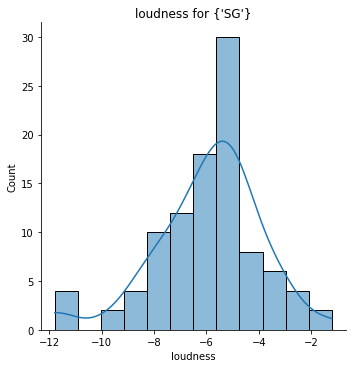

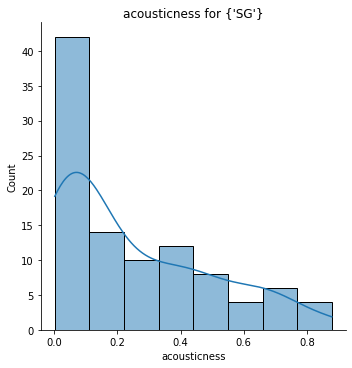

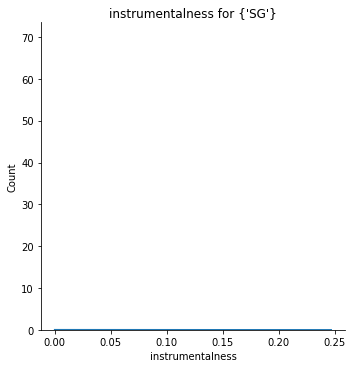

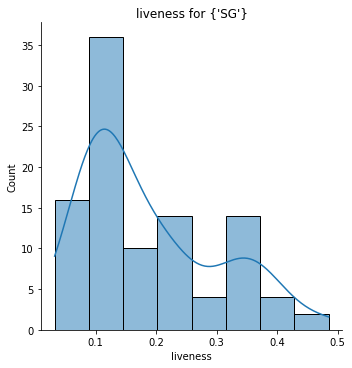

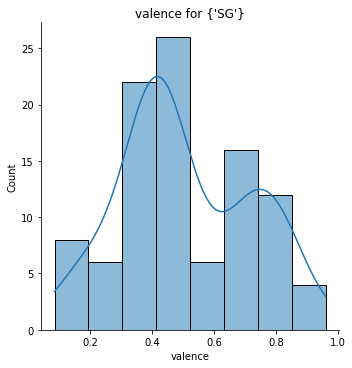

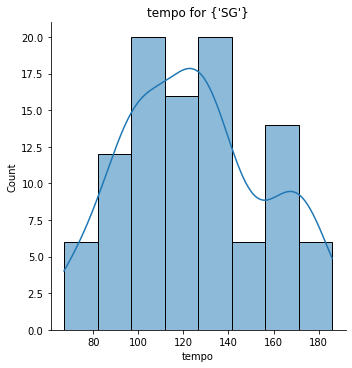

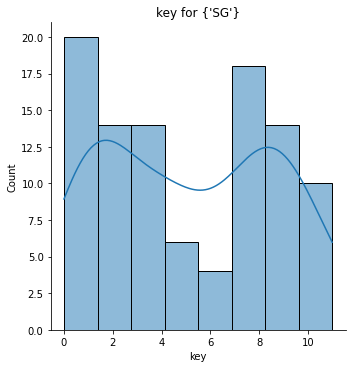

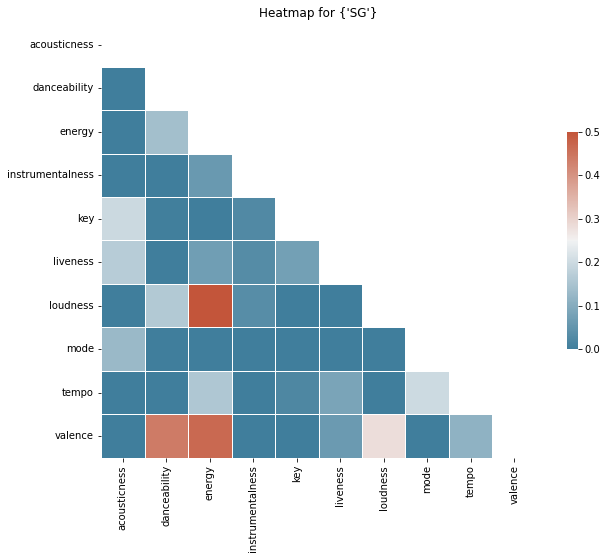

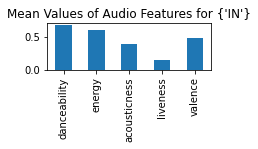

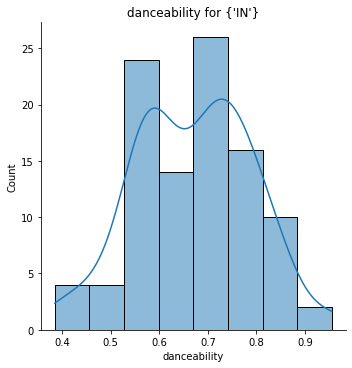

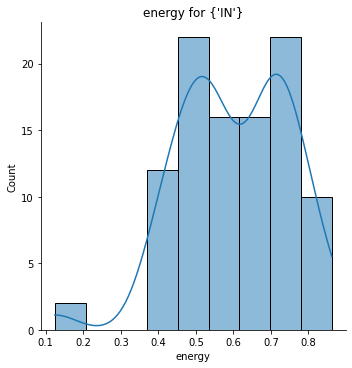

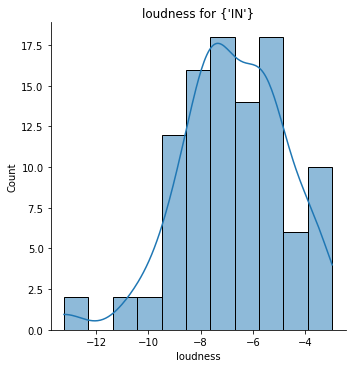

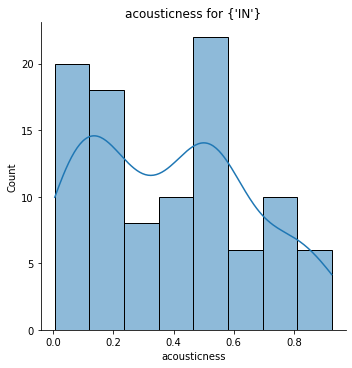

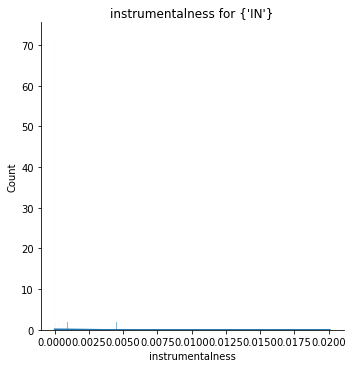

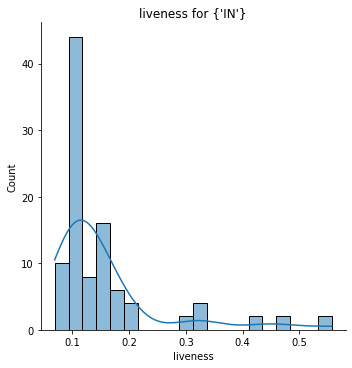

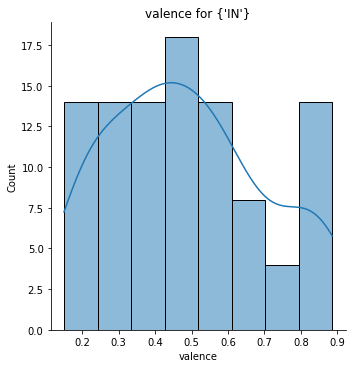

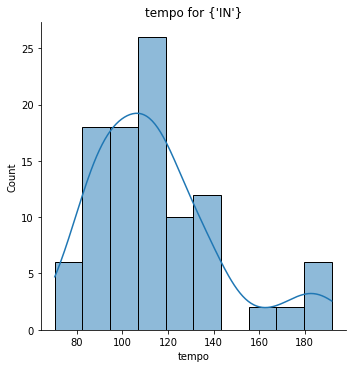

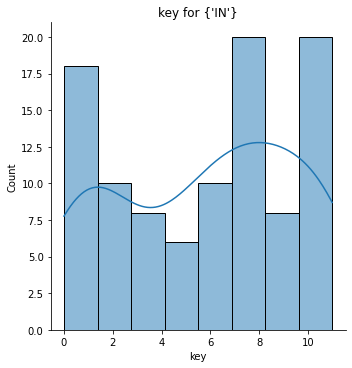

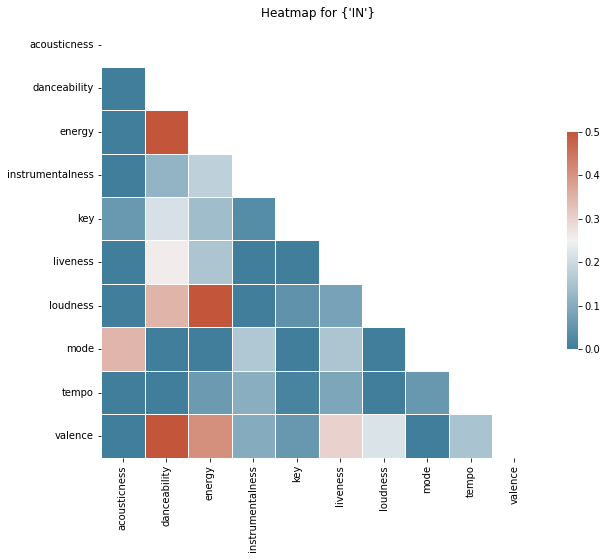

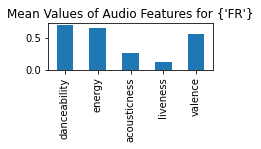

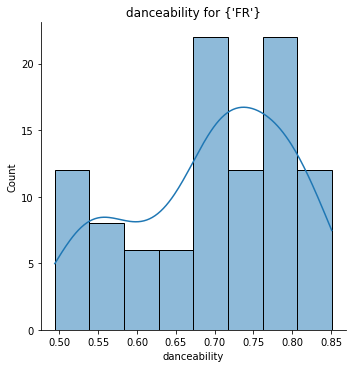

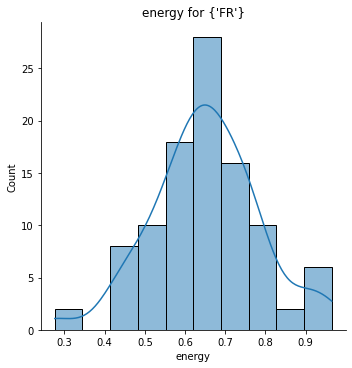

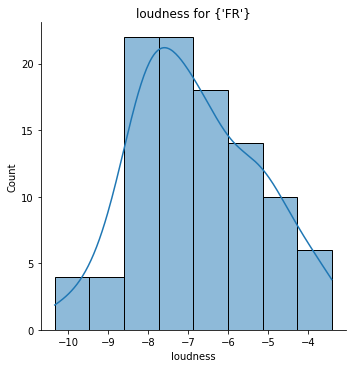

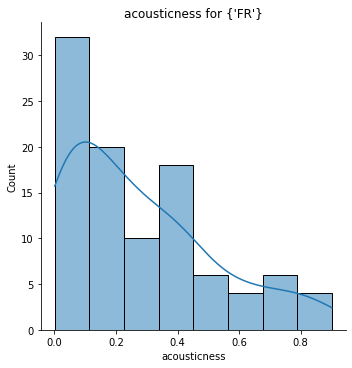

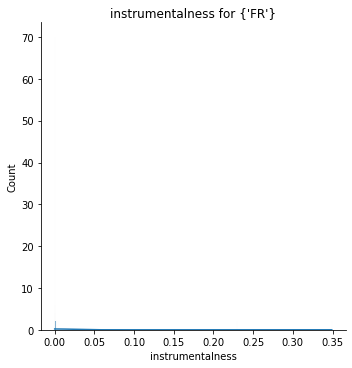

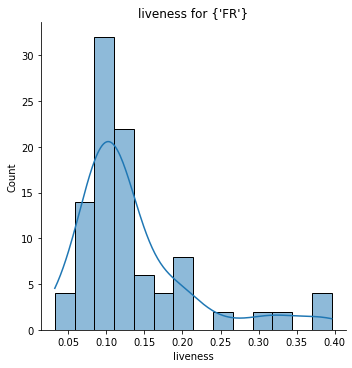

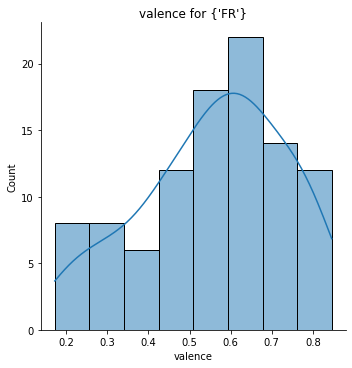

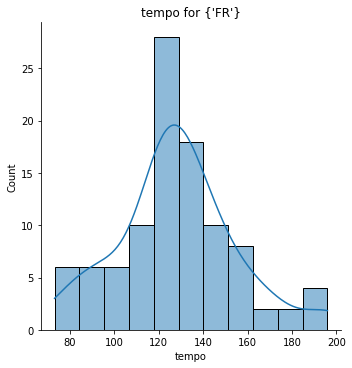

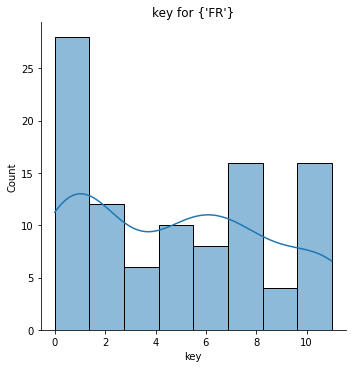

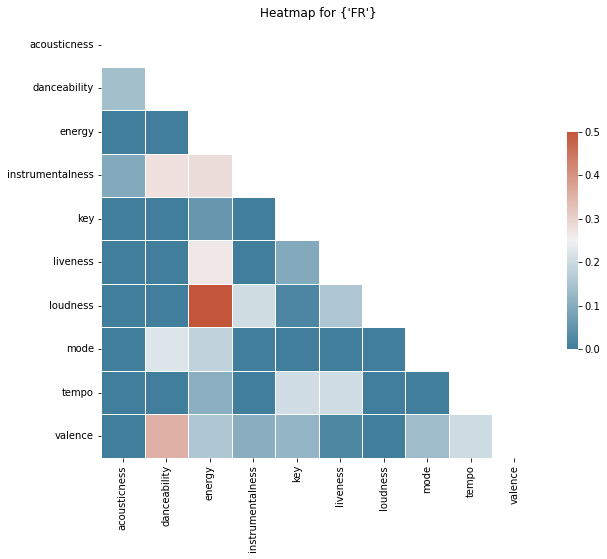

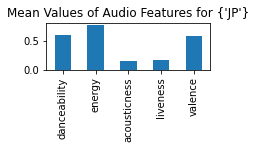

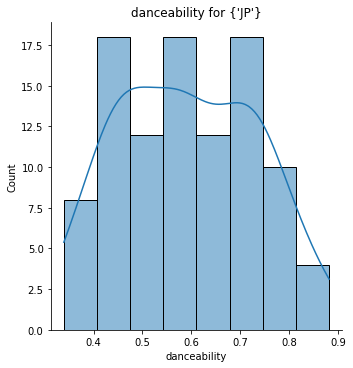

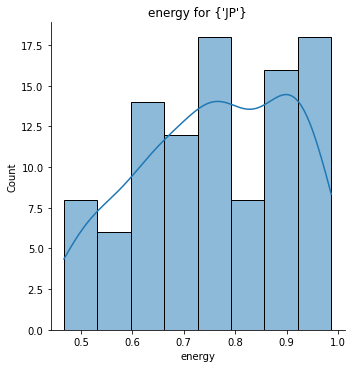

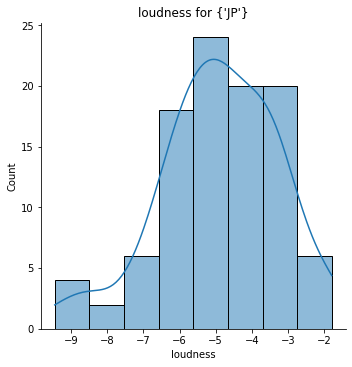

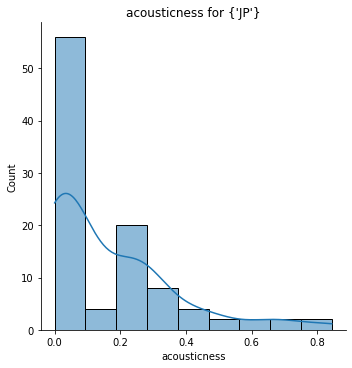

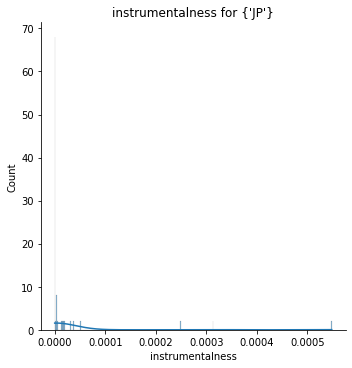

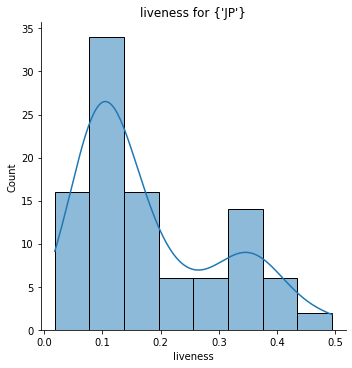

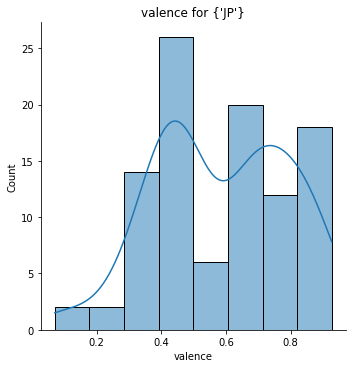

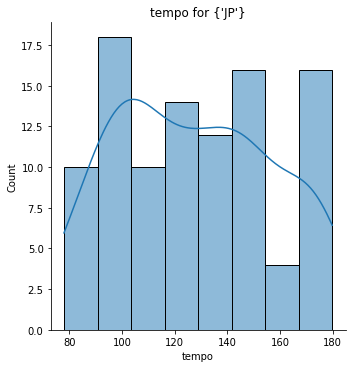

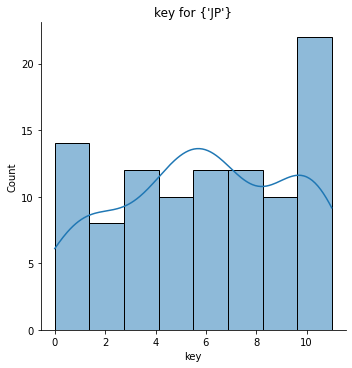

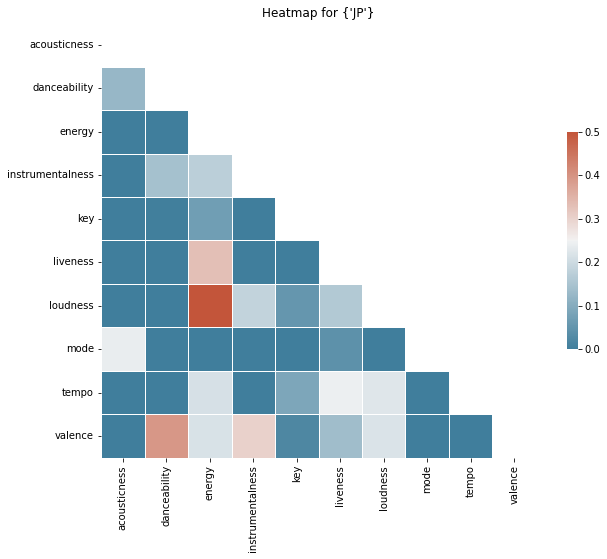

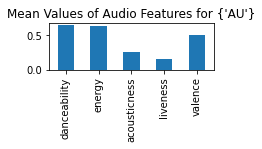

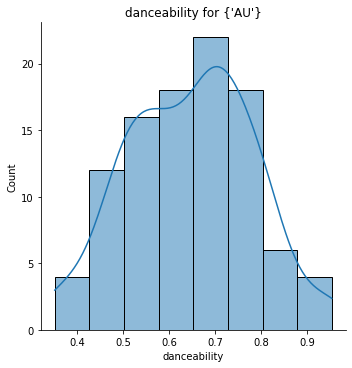

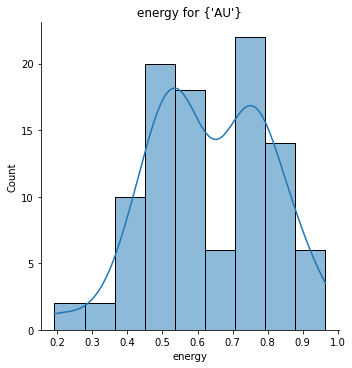

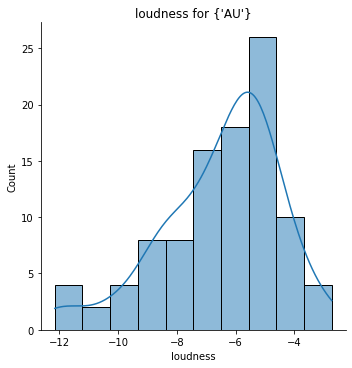

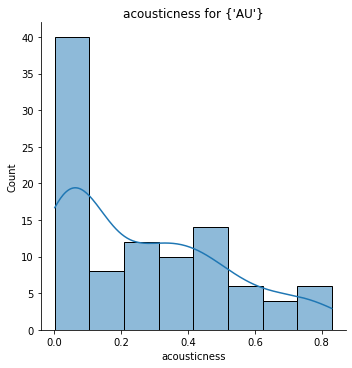

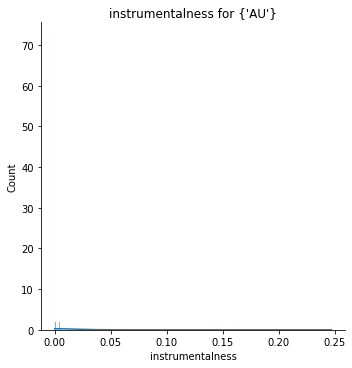

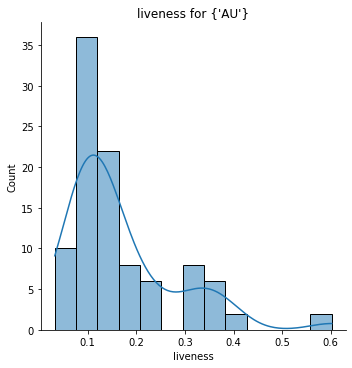

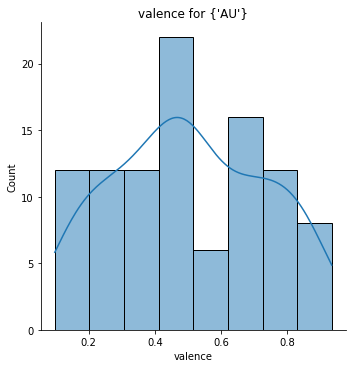

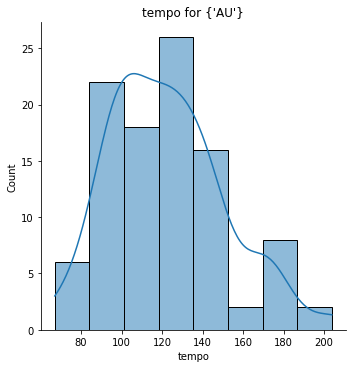

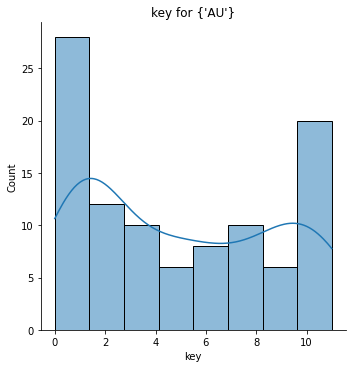

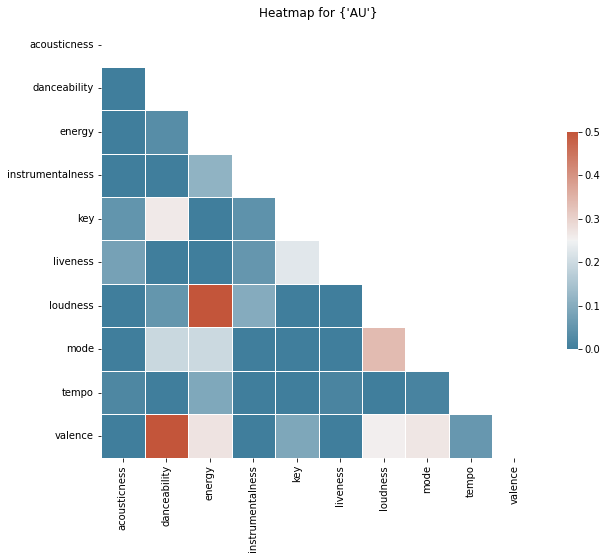

In [32]:
for i, country in enumerate(country_list):
    countryselected_df = df[df['country']==country]
    get_audio_feature_mean(countryselected_df,i)
    get_feature_hist(countryselected_df)
    get_heatmap(countryselected_df)

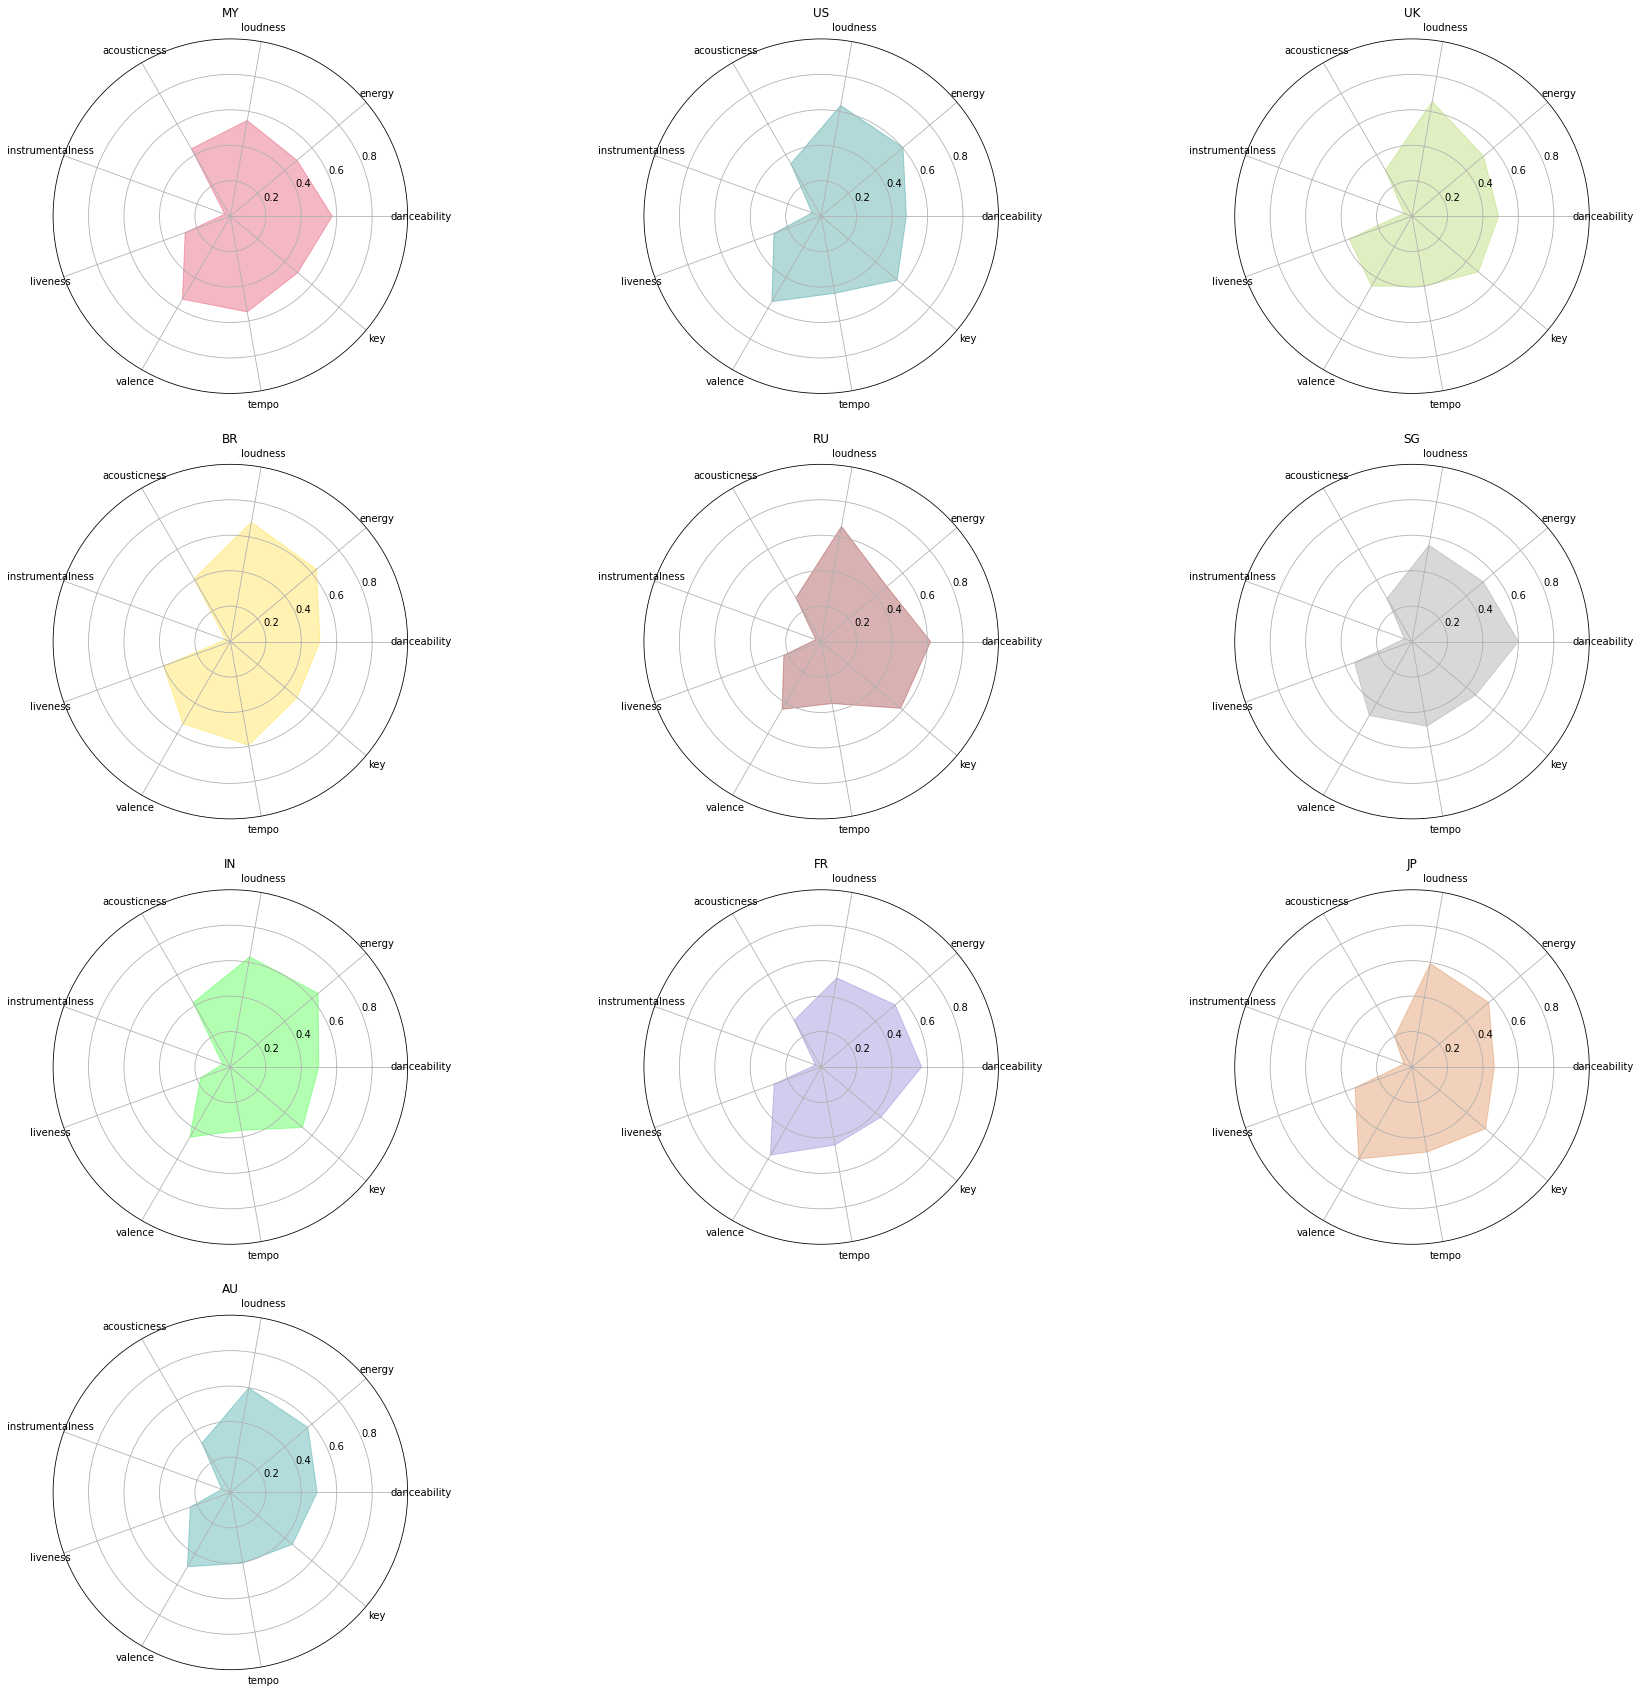

In [33]:
color = ['crimson', 'teal', 'yellowgreen', 'gold', 'maroon', 'gray', 'lime', 'slateblue', 'chocolate', 'darkcyan']
plt.rcParams['figure.figsize'] = (30,30)

# for loop to plot audio feature profiles for each country's top playlist
for i, country in enumerate(country_list):
  countryselected_df = df[df['country']==country]
  ax = plt.subplot(4,3,int(i+1), polar='True')
  ax.title.set_text(country)
  radar_chart(countryselected_df,color[i])

plt.show()